# Предсказание временных рядов

## Введение. Постановка целей и задач.

Цель работы: создать модель для прогноза средмесячной температуры поверхности моря.

Температура поверхности океана представляет собой одну из важнейших характеристик морской воды, оказывающих влияние на климат земного шара. Данные  особенно полезны для определения начала циклов Эль-Ниньо (в переводе с испанского означает «Маленький мальчик») и Ла-Нинья (в переводе с испанского означает «Маленькая девочка»). Эль-Ниньо и Ла-Нинья — это климатические явления в Тихом океане, которые могут влиять на погоду во всем мире.
Южноамериканские рыбаки впервые заметили периоды необычно теплой воды в Тихом океане в 1600-х годах. Полное название, которое они использовали, было Эль-Ниньо де Навидад, потому что **пик Эль-Ниньо обычно приходится на декабрь**. Первое упоминание термина «Эль-Ниньо» относится к 1892 году, когда капитан Камило Каррило сообщил на конгрессе Географического Общества в Лиме, что перуанские моряки назвали теплое северное течение «Эль-Ниньо», так как **оно наиболее заметно в дни католического Рождества **(эль ниньо называют младенца Христа).Только к концу XX века выяснились связи Эль-Ниньо с климатом планеты.

Во время Эль-Ниньо температура в Тихом океане у экватора выше нормы. Во время Ла-Нинья в той же области температура океана ниже обычной. Эти циклы вызваны многолетними изменениями давления и скорости ветра и влияют на циркуляцию океана, глобальные погодные условия и морские экосистемы.

Измерения полезны для широкого спектра оперативных приложений, включая климатический и сезонный мониторинг/прогнозирование, операции военной обороны, проверку моделей атмосферы, отслеживание морских черепах, оценку обесцвечивания кораллов, туризм и управление коммерческим рыболовством.

Эль-Ниньо наблюдалось с сентября 2006 года[23] до начала 2007 года[24]. В результате засуха 2007 года вызвала скачок в ценах на продовольственные товары и связанные с этим общественные беспорядки в Египте, Камеруне и Гаити[25].
Согласно Национальному управлению океанических и атмосферных исследований США Эль-Ниньо началось в экваториальной части Тихого океана в июне 2009 года, достигнув пика в январе — феврале 2010 года.
Повышенная температура поверхности воды наблюдалась до мая 2010 года, перейдя затем в пониженное значение (Ла-Нинья) и вернувшись к нормальным значениям к апрелю 2012 года. Этот приход Эль-Ниньо вызвал самую суровую за последние четыре десятилетия засуху в Индии[25].
В июне 2014 года Метеорологическая служба Великобритании[en] сообщила о высокой вероятности развития Эль-Ниньо в 2014 году[26], однако, её прогноз не сбылся[27]. Осенью 2015 года Всемирная метеорологическая организация сообщила, что, появившийся раньше срока и получивший название «Брюс Ли», Эль-Ниньо может стать одним из самых мощных, начиная с 1950 года[28][29]. Дожди и наводнения сопровождали Рождественские праздники в США (вдоль реки Миссисипи), в Южной Америке (вдоль Ла-Платы) и даже в Северо-Западной Англии. В 2016 году влияние Эль-Ниньо продолжилось.


Задачи:
1) импортировать датасет о среднемесячной температуре поверхности моря в градусах Цельсия в Тихом океане между 0–10 градусами южной широты и 90–80 градусами западной долготы с 1950 по 2010 годи и выполнить предобработку датасета (поиск пропусков, визуализация, информация о типах данных, фильтрация и визуализация данных в зимние месяцы для отслеживания сезонности тренда).
2) провести разведочный анализ данных.
3) сделать прогноз на 2011-2012 гг.


### Импорт Датафрейма, библиотек, написание функций.

In [ ]:
## Здесь импортируем библиотеки и функции
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
## Здесь импортируем данные.
import statsmodels.api as sm
data = sm.datasets.elnino.load_pandas()
y=data.data
y

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21


### Знакомство с данными.

Этот блок посвящен первоначальному знакомству с данными

Наша задача - посмотреть на данные методами .info(), а также изучить их визуально.

Будет удобно рассматривать определенный блок - одну страну, один месяц одной страны.

Здесь же надо определиться с описанием данных - лучше всего для себя пояснить, с чем мы имеем дело. В данном случае столбцов слишком много, поэтому необходимо описать только самое важное - максимум 7-8 столбцов.

Как только у нас есть информация, что данные получены без ошибок, а также есть самое общее представление о содержимом, мы можем перейти к следующему пункту..

In [ ]:
y.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1980.000000,24.392131,25.839344,26.247705,25.386557,24.161967,22.833934,21.743934,20.842787,20.583770,20.862295,21.523934,22.693115
std,17.752934,0.913946,0.800560,0.896667,1.126876,1.323505,1.282808,1.228692,1.138723,1.006958,1.054401,1.094229,1.083051
min,1950.000000,22.980000,24.200000,24.470000,22.970000,21.730000,20.770000,19.520000,19.270000,18.950000,19.110000,19.440000,21.050000
25%,1965.000000,23.840000,25.360000,25.600000,24.670000,23.290000,21.840000,21.010000,20.030000,19.850000,20.140000,20.770000,22.030000
50%,1980.000000,24.320000,25.770000,26.090000,25.210000,23.880000,22.540000,21.470000,20.640000,20.500000,20.620000,21.490000,22.500000
75%,1995.000000,24.710000,26.270000,26.890000,25.840000,24.750000,23.280000,22.310000,21.390000,21.230000,21.640000,22.170000,23.210000
max,2010.000000,28.120000,28.820000,29.240000,28.820000,28.370000,27.430000,25.730000,24.950000,24.690000,24.640000,25.850000,27.080000


максимальный показатель за декабрь - 27.08, январь - 28.12, февраль - 28.82, март-29.24

In [ ]:
len(y)

61

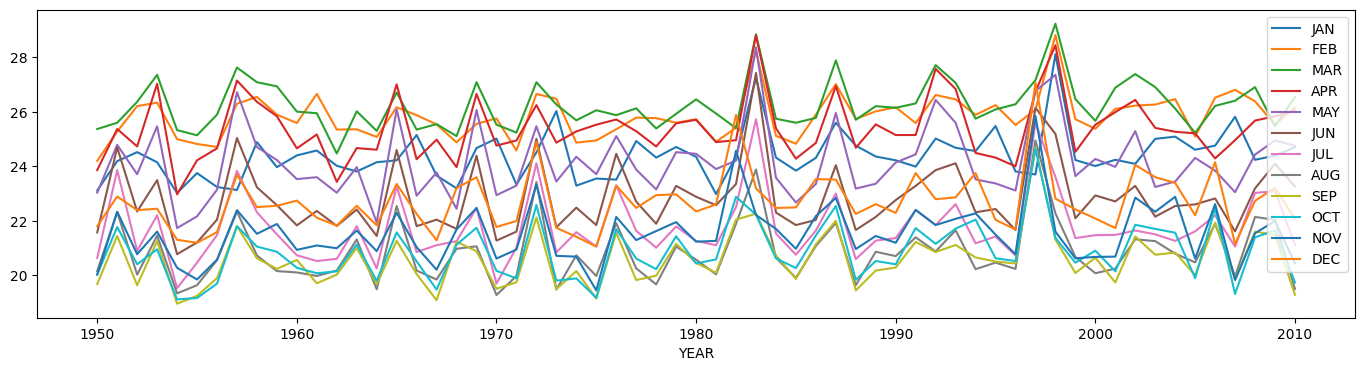

In [ ]:
y.plot(x='YEAR',figsize=(17, 4))
plt.show()

Самые высокие показатели наблюдались в марте (зеленый), феврале (ярко-оранжевый), апреле (красный), январе (темно-синий).

## Предобработка данных

### Фильтрация данных

Обычно фильтрацию данных делают позже - когда нужно непосредственно работать с данными. В нашем случае это неудобно: у нас условие, по которому мы выбираем какой-либо параметр

С другой стороны, столбцов в задании может быть многовато. Поэтому на этом этапе нам нужно избавиться от всех ненужных столбцов. Чтобы понять, какие столбцы нужны - лучше всего вспомнить суть задачи.


По итогу у нас должен остаться небольшой **датасет**.

In [ ]:
y_filtered=y[['YEAR','DEC','JAN','FEB','MAR']]
y_filtered

,YEAR,DEC,JAN,FEB,MAR
0,1950.0,21.80,23.11,24.20,25.37
1,1951.0,22.89,24.19,25.28,25.60
2,1952.0,22.39,24.52,26.21,26.37
3,1953.0,22.44,24.15,26.34,27.36
4,1954.0,21.30,23.02,25.00,25.33
...,...,...,...,...,...
56,2006.0,24.15,24.76,26.52,26.22
57,2007.0,21.15,25.82,26.81,26.41
58,2008.0,22.73,24.24,26.39,26.91
59,2009.0,23.21,24.39,25.53,25.48


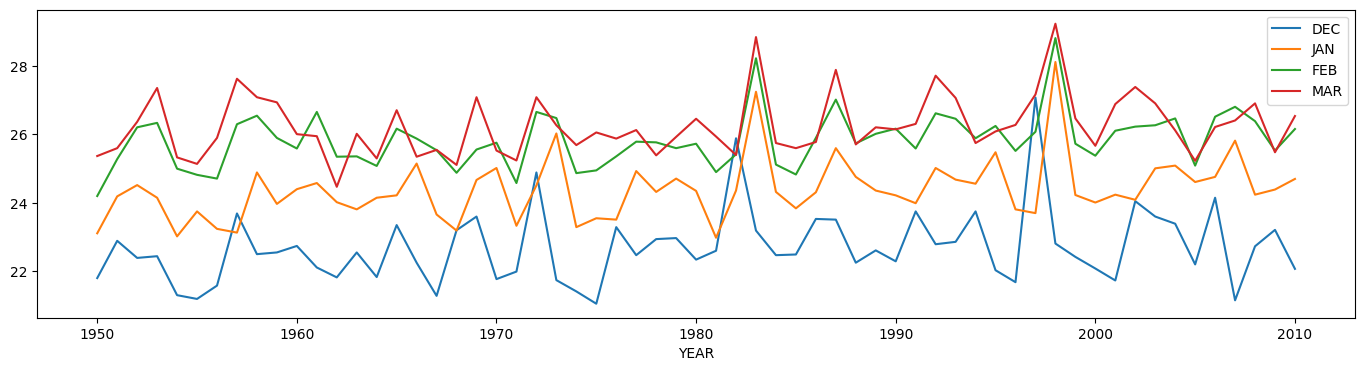

In [ ]:
y_filtered.plot(x='YEAR',figsize=(17, 4))
plt.show()

### Обработка пропусков

In [ ]:
print(y_filtered.dropna())


      YEAR    DEC    JAN    FEB
0   1950.0  21.80  23.11  24.20
1   1951.0  22.89  24.19  25.28
2   1952.0  22.39  24.52  26.21
3   1953.0  22.44  24.15  26.34
4   1954.0  21.30  23.02  25.00
..     ...    ...    ...    ...
56  2006.0  24.15  24.76  26.52
57  2007.0  21.15  25.82  26.81
58  2008.0  22.73  24.24  26.39
59  2009.0  23.21  24.39  25.53
60  2010.0  22.07  24.70  26.16

[61 rows x 4 columns]


In [ ]:
y_filtered.isnull().sum()


YEAR    0
DEC     0
JAN     0
FEB     0
dtype: int64

### Вывод по этапу.


Пропуски в данных отсутствуют.

## EDA или разведочный анализ данных.

В данном блоке наша задача - познакомиться "поближе" с данными, которыми мы располагаем.

Что лучше всего сделать:    
- Сделать столбец с датами индексом;
- Вывести статистику по нужным столбцам;
- Построить графическое отображение столбцов;
- Попробовать определить - есть ли столбцы, которые мы можем отфильтровать (к примеру, самые ранние записи, где информации могло не быть и где были NaN). **- такого может и не быть**


Проделав действия выше, мы выполним минимум, необходимый для дальнейшей работы.

Помимо этой информации, здесь же нужно всесторонне познакомиться с рассматриваемыми данными в контексте процесса/явления.

Хорошо здесь описать всё, что влияет на метрику, и что может нам помочь определить следующее: можем ли мы достоверно предсказать рост или падение метрики на основании одной переменной? Или здесь нужны методы посложнее, с большим числом входных данных и зависимостей?

Отвечайте на вопросы честно!

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.7 MB/s eta 0:00:00


In [ ]:
y_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    61 non-null     float64
 1   DEC     61 non-null     float64
 2   JAN     61 non-null     float64
 3   FEB     61 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


Данные типа float

In [ ]:

%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

Преобразуем объект типа DataFrame так, чтобы индексом стал год, то есть временной ряд.

In [ ]:
y_filtered ['YEAR']=y_filtered ['YEAR'].astype('int')
y_filtered

,YEAR,DEC,JAN,FEB,MAR
0,1950,21.80,23.11,24.20,25.37
1,1951,22.89,24.19,25.28,25.60
2,1952,22.39,24.52,26.21,26.37
3,1953,22.44,24.15,26.34,27.36
4,1954,21.30,23.02,25.00,25.33
...,...,...,...,...,...
56,2006,24.15,24.76,26.52,26.22
57,2007,21.15,25.82,26.81,26.41
58,2008,22.73,24.24,26.39,26.91
59,2009,23.21,24.39,25.53,25.48


In [ ]:
y_filtered ['year']= pd.to_datetime(y_filtered['YEAR'],format='%Y')
y_filtered.head()

#y_filtered.set_index('date', inplace = True)
#y_filtered.index.freq = 'MS'
#y_filtered.head()

,YEAR,DEC,JAN,FEB,MAR,year
0,1950,21.80,23.11,24.20,25.37,1950-01-01
1,1951,22.89,24.19,25.28,25.60,1951-01-01
2,1952,22.39,24.52,26.21,26.37,1952-01-01
3,1953,22.44,24.15,26.34,27.36,1953-01-01
4,1954,21.30,23.02,25.00,25.33,1954-01-01


In [ ]:
y_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    61 non-null     int64         
 1   DEC     61 non-null     float64       
 2   JAN     61 non-null     float64       
 3   FEB     61 non-null     float64       
 4   MAR     61 non-null     float64       
 5   year    61 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.0 KB


In [ ]:
y2=y_filtered.set_index('year')
y2.head()

,YEAR,DEC,JAN,FEB,MAR
year,,,,,
1950-01-01,1950,21.80,23.11,24.20,25.37
1951-01-01,1951,22.89,24.19,25.28,25.60
1952-01-01,1952,22.39,24.52,26.21,26.37
1953-01-01,1953,22.44,24.15,26.34,27.36
1954-01-01,1954,21.30,23.02,25.00,25.33


для обучения модели выберем срез с 1990 по 2006 гг.

In [ ]:
y2=y2.iloc[40:57]

In [ ]:
len(y2)

17

In [ ]:
Для прогноза возьмем декабрь

In [ ]:
itog = y2['DEC'].describe()


In [ ]:
print (itog['std']/itog['mean'])

0.05652093135188827


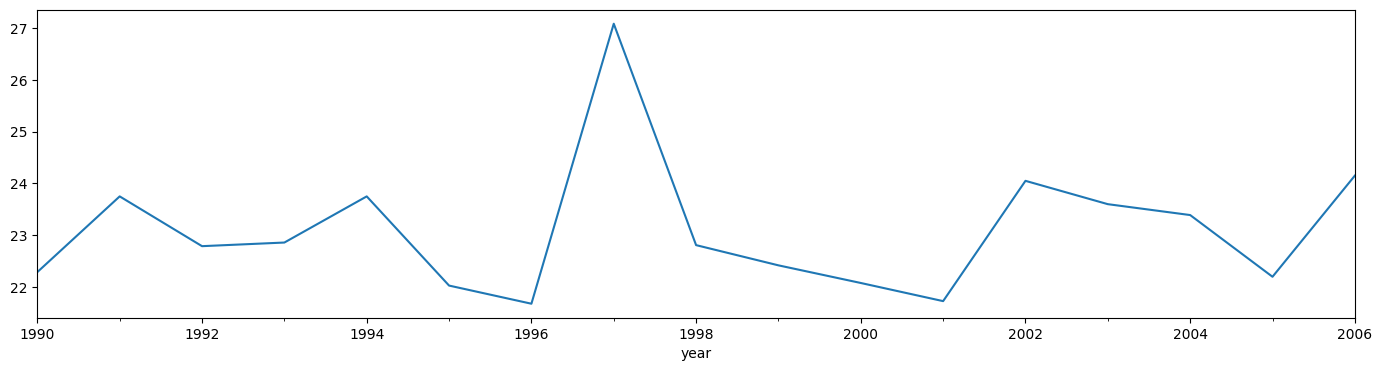

In [ ]:
y2['DEC'].plot(x='YEAR',figsize=(17, 4))
plt.show()

Ряд более менее однородный и имеет относительно небольшой разброс о чем свидетельствует небольшой коэффициент вариаци

## Построение моделей, анализ результатов.

В данном блоке у нас должно быть от трёх до четырех подглав:    
- Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.
- Применение 1 способа прогнозирования;
- Применение 2 способа прогнозирования;
- (Применение 3 способа прогнозирования); **По желанию**

Первый пункт - разделение датасета - универсален, данные из него не нужно обновлять или заного рассчитывать.

Остальные три пункта содержат примерно одинаковый алгоритм действий:    
1. Описываем вкратце модель.
2. Создаем модель.
3. Обучаем модель.
4. Создаем прогноз.
5. Сравниваем прогноз и предсказание.
6. Рассчитываем качество полученной модели и прогноза.
7. Делаем выводы по прогнозу.


Какие модели у нас есть:
- В рамках курса мы рассмотрели модель ARIMA, её улучшенную версию SARIMA. Обязательно попробуйте использовать эту модель;
- Модель экспаненционного сглаживающего среднего;
- Модель Хольта-Винтерса.

Последние 2 модели мы не изучали, поэтому можно попробовать использовать составные от модели ARIMA, которые мы рассматривали в лекции - AR, MA.

После получения прогноза отобразите графики **прогноз vs факт**, чтобы визуально можно было посмотреть на то, как точно построен прогноз.

Как понять, подходит ли модель. Попробуйте использовать следующие методы рассчета ошибки:
- MAPE или средняя абсолютная ошибка в процентах.
- RMSE - квадратный корень из среднеквадратичной ошибки.
- MSE - среднеквадратичный корень (связан  с RMSE).

В конце - сравните полученные метрики с ошибками и выберите ту модель, которая точнее всего создает прогноз.

Ещё один важный момент - горизонт прогнозирования и сравнение прогноза с данными. Горизонт планирования нужно сделать небольшим - примерно 10-15 наблюдений (то есть 10-15 дней). И в ошибку нужно сравнивать с таким же числом наблюдений за тот же период по реальным данным!

Также отмечу, что прогноз, скорее всего, будет не самым точным, а возможно, он совсем покажет что-то непонятное.

Создадим модель для прогноза температуры в январе на 2011-2012 год

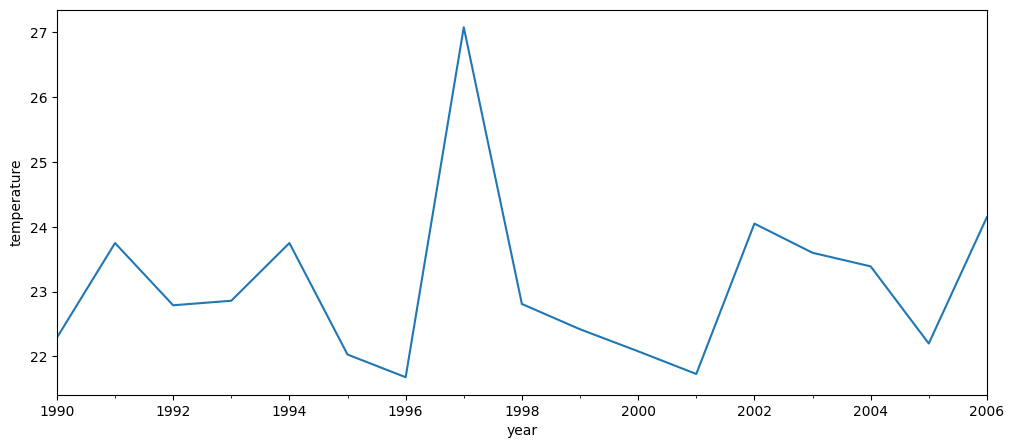

In [ ]:
ax = y2['DEC'].plot(figsize=(12,5));
plt.ylabel('temperature')
ax.autoscale(axis='year', tight=True)


Разложим временной ряд на компоненты

https://habr.com/ru/articles/207160/

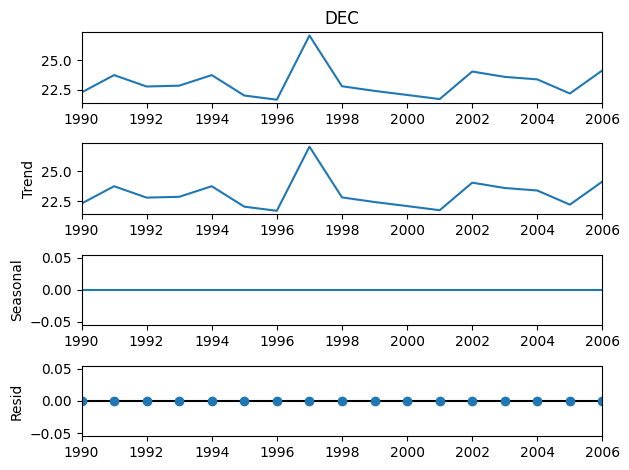

In [ ]:
ets_decompose = seasonal_decompose(y2['DEC'], model='additive')
ets_decompose.plot();
plt.show()


In [ ]:
auto_arima(y2['DEC'], seasonal=False, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   17
Model:                        SARIMAX   Log Likelihood                 -28.139
Date:                Mon, 08 May 2023   AIC                             60.277
Time:                        06:27:42   BIC                             61.944
Sample:                    01-01-1990   HQIC                            60.443
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.0976      0.448     51.538      0.000      22.219      23.976
sigma2         1.6041      0.505      3.179      0.001       0.615       2.593
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                14.25
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             1.64
Prob(H) (two-sided):                  0.49   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = y2['DEC'].iloc[:13]
test = y2['DEC'].iloc[13:]

In [ ]:
#сделайте обучние модели на тестовых данных
#подставьте в order=(, , ) и seasonal_order=(, , , ) значения которые получились с шага "auto_arima" в поле Model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(1,1 ,3 ), seasonal_order=(2,0 ,1 ,12 ) )
results = model.fit()
results.summary()

LinAlgError: ignored

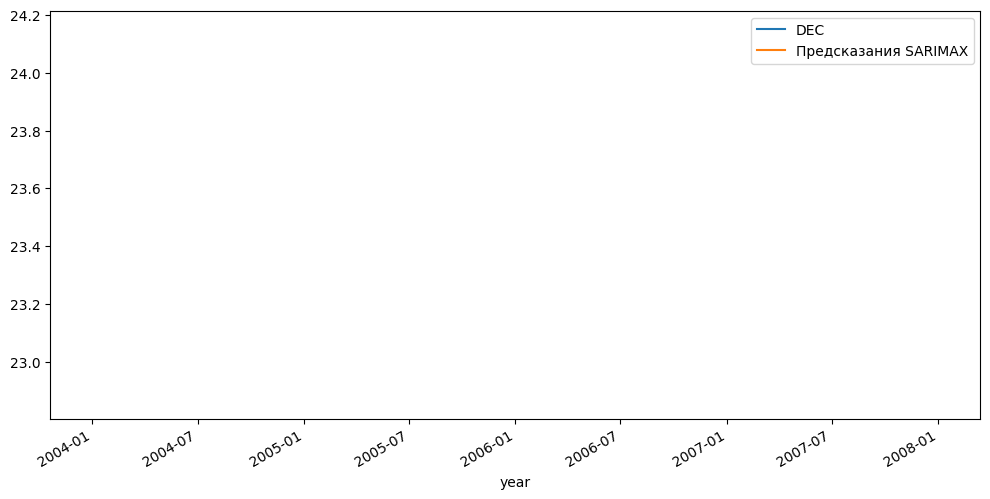

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Предсказания SARIMAX')

test.plot(figsize=(12,6), legend=True);
predictions.plot(figsize=(12,6), legend=True);

In [ ]:
#сделайте обучние модели на полных данных
#подставьте в order=(, , ) и seasonal_order=(, , , ) значения которые получились с прошлых шагов

model = SARIMAX(y2['DEC'], order=(1, 1, 3), seasonal_order=(2,0 ,1 ,12 ) )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  DEC   No. Observations:                   21
Model:             SARIMAX(1, 1, 3)x(2, 0, [1], 12)   Log Likelihood                 -32.150
Date:                              Mon, 08 May 2023   AIC                             80.301
Time:                                      06:20:14   BIC                             88.267
Sample:                                  01-01-1990   HQIC                            81.856
                                       - 01-01-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5891      0.538     -1.096      0.273      -1.643       0.465
ma.L1         -0.7730     30.033     -0.026      0.979     -59.637      58.091
ma.L2         -0.8887     52.702     -0.017      0.987    -104.183     102.406
ma.L3          0.8802     25.868      0.034      0.973     -49.820      51.580
ar.S.L12      -0.0043    178.545   -2.4e-05      1.000    -349.945     349.937
ar.S.L24       0.9682     42.734      0.023      0.982     -82.789      84.725
ma.S.L12      -0.0434   2806.698  -1.55e-05      1.000   -5501.070    5500.983
sigma2         0.0680     30.863      0.002      0.998     -60.422      60.558
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.00
Prob(Q):                              0.94   Prob(JB):                         0.08
Heteroskedasticity (H):               0.44   Skew:                             1.01
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

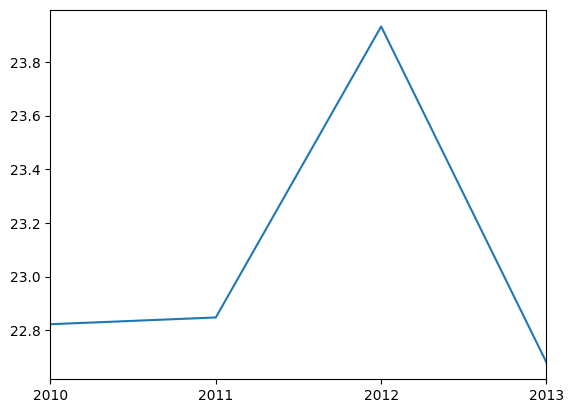

In [ ]:
#сделайте предсказание модели на указанное количество шагов вперед
fcast = results.predict(len(y2['DEC'])-1, len(y2['DEC'])+2, dynamic=False, typ='levels').rename('Предсказания на 5 лет вперед')
fcast.plot();

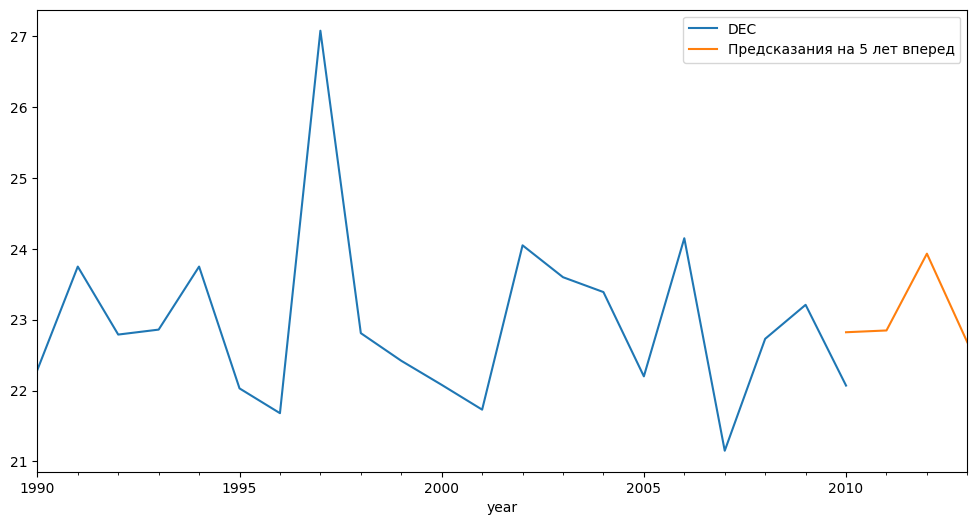

In [ ]:
#сделайте визуализацию данных
y2['DEC'].plot(figsize=(12,5), legend=True);
fcast.plot(figsize=(12,6), legend=True);

## Выводы

В данном блоке опишите общие выводы по работе: что было сделано, что было получено. Помните, отрицательный результат - тоже результат. Поэтому указывайте информацию честно и беспристратно.